<a href="https://colab.research.google.com/github/Ayush2102/Monkey-Pox-Cases-Exploratory-Data-Analysis/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset:

In [2]:
df = pd.read_csv('/data/Monkey_Pox_Cases_Worldwide.csv')

## Exploring Dataset:

In [3]:
df.shape

(41, 6)

In [4]:
df.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,183.0,0.0,5.0,2.0,7.0
1,Portugal,100.0,0.0,0.0,0.0,34.0
2,Spain,136.0,66.0,10.0,2.0,0.0
3,United States,19.0,0.0,2.0,9.0,0.0
4,Canada,27.0,36.0,1.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             41 non-null     object 
 1   Confirmed_Cases     41 non-null     float64
 2   Suspected_Cases     41 non-null     float64
 3   Hospitalized        41 non-null     float64
 4   Travel_History_Yes  41 non-null     float64
 5   Travel_History_No   41 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.0+ KB


# **Univariate Analysis**

In [6]:
pd.set_option('display.max_rows', 500)
unique_values_1 = []
unique_values_2 = []
unique_values_3 = []
for k in df.columns:
    unique_values_1.append(k)
    unique_values_2.append(df[k].nunique())
    unique_values_3.append(round(df[k].nunique()*100/df.shape[0], 2))
unique_values = pd.concat([pd.DataFrame(unique_values_1, columns = ['Variables']), 
          pd.DataFrame(unique_values_2, columns = ['Unique Values']), 
          pd.DataFrame(unique_values_3, columns = ['Percent_Unique_Values'])], axis = 1)
unique_values

,Variables,Unique Values,Percent_Unique_Values
0,Country,41,100.00
1,Confirmed_Cases,15,36.59
2,Suspected_Cases,8,19.51
3,Hospitalized,8,19.51
4,Travel_History_Yes,6,14.63
5,Travel_History_No,4,9.76


In [7]:
df_categorical = df.select_dtypes(['object'])
df_continuous = df.select_dtypes(['float64', 'int64'])

Histogram:

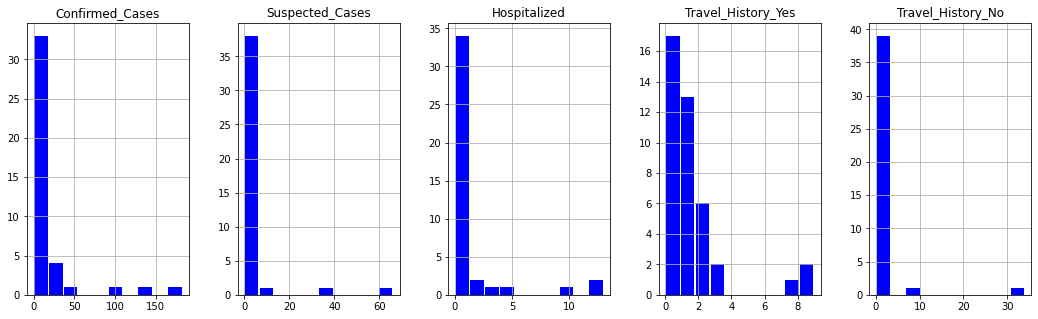

In [8]:
df_continuous.hist(figsize = (18, 5), layout = (1, 5), rwidth = 0.9, color = '#0000ff')
plt.show()

## Outlier Detection:

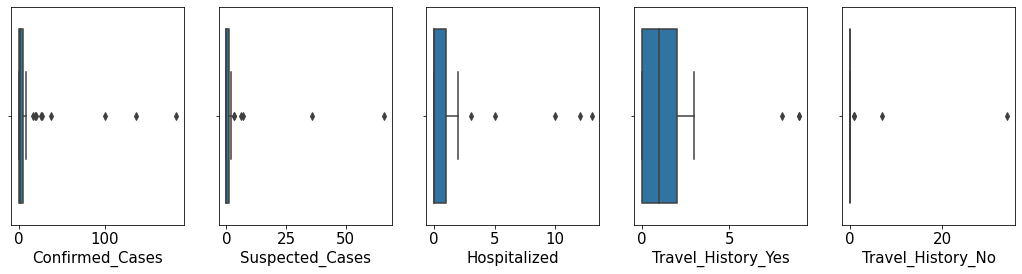

In [9]:
count = 0
fig, ax = plt.subplots(1, df_continuous.shape[1], figsize = (18, 4))
for j in range(df_continuous.shape[1]):
    plt.subplot(1, df_continuous.shape[1], count + 1)
    b = sns.boxplot(x = df_continuous.iloc[:, j])
    b.set_xlabel(df_continuous.columns[j], fontsize = 15)
    b.tick_params(labelsize = 15)
    count += 1
plt.show()

There are ouliers in all variables.

# **Bivariate Analysis**

## Continuous - Continuous Bivariate Analysis

Correlation Matrix:

In [10]:
corr = df_continuous.corr()
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap = sns.diverging_palette(10, 133, as_cmap = True), axis = None, vmin = -1, vmax = 1)
 .highlight_null(null_color = '#f1f1f1')
 .format(precision = 2))

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
Confirmed_Cases,nan,nan,nan,nan,nan
Suspected_Cases,0.49,nan,nan,nan,nan
Hospitalized,0.48,0.44,nan,nan,nan
Travel_History_Yes,0.16,0.04,0.72,nan,nan
Travel_History_No,0.50,-0.05,-0.02,-0.08,nan


## Categorical - Continuous Bivariate Analysis

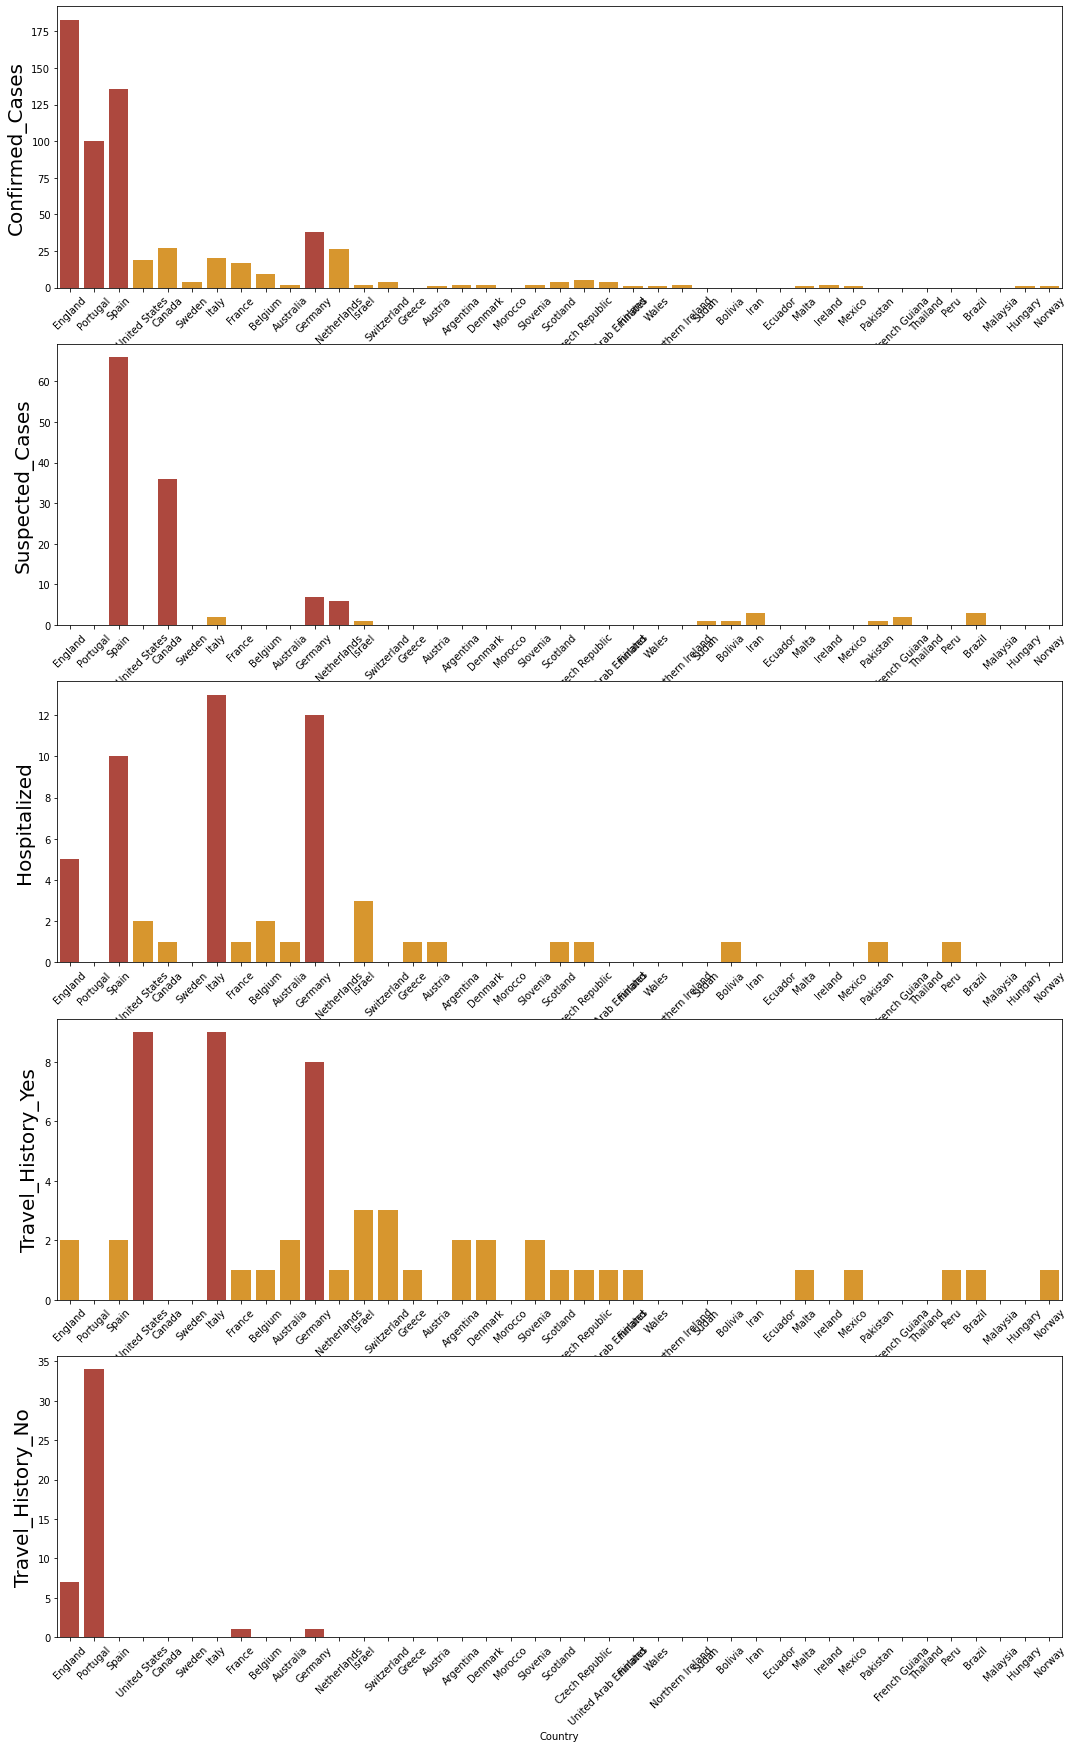

In [11]:
count = 0
plt.subplots(df.shape[1] - 1, 1, figsize = (18, 30))
for j in range(1, df.shape[1]):
    plt.subplot(df.shape[1] - 1, 1, count + 1)
    b = sns.barplot(x = df.iloc[:,0], y = df.iloc[:, j], orient = 'vertical', 
                    palette = ['#c0392b' if (x > df.iloc[:, j].nlargest(5).reset_index(drop = True)[4]) else '#f39c12' for x in df.iloc[:, j]])
    b.set_xlabel(df.columns[0], fontsize = 10)
    b.set_ylabel(df.columns[j], fontsize = 20, rotation = 90)
    b.set_xticklabels(b.get_xticklabels(), rotation = 45)
    count += 1
plt.show()